<a href="https://colab.research.google.com/github/carlosgilrodrigo/TFM/blob/main/TFM_CarlosGilRodrigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Trabajo de Fin de Máster**
Análisis de los efectos del factor de localidad en el desempeño de equipos de la Premier League.

# 1 - Introducción y objetivo

En esta actividad se utiliza un conjunto de datos con todos los partidos desde 2010 hasta 2021 en la Premier League, liga inglesa de fútbol. El objetivo final es analizar el impacto del factor de localidad en el desempeño de equipos de la Premier League, es decir, conocer la trascendencia de jugar como local. Para ello, se hará uso del proceso KDD.

# 2 - Información adicional

El conjunto de datos se puede obtener a partir del siguiente enlace: https://www.kaggle.com/datasets/pablohfreitas/all-premier-league-matches-20102021?select=df_full_premierleague.csv

Se utilizan las herramientas Panda, Numpy y Seaborn, además de las referentes a Matplotlib para poder graficar.

In [1]:
#Importación de paquetes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

Lectura del fichero de fuente de datos. Dataset "All Premier League Matches 2010-2021" con el histórico de partidos de la liga inglesa de fútbol entre los años 2010 y 2021. Cuenta con 114 columnas y ha sido extraído de la plataforma Kaggle.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
#Lectura de datos
df = pd.read_csv('/content/drive/MyDrive/TFM/df_full_premierleague.csv', decimal='.')

Comprobación de los tipos de datos y del número de instancias.

In [83]:
print("DIMENSIONALIDAD DEL DATAFRAME: \n")
print(df.shape,"\n")
print("TIPOS DE DATOS: \n")
print(df.dtypes,"\n")
print("COLUMNAS: \n")
print(df.columns)

DIMENSIONALIDAD DEL DATAFRAME: 

(4070, 114) 

TIPOS DE DATOS: 

Unnamed: 0                    int64
link_match                   object
season                       object
date                         object
home_team                    object
                             ...   
sg_match_ft_acum_away       float64
goals_scored_ht_avg_away    float64
goals_conced_ht_avg_away    float64
sg_match_ht_acum_away       float64
performance_acum_away       float64
Length: 114, dtype: object 

COLUMNAS: 

Index(['Unnamed: 0', 'link_match', 'season', 'date', 'home_team', 'away_team',
       'result_full', 'result_ht', 'home_clearances', 'home_corners',
       ...
       'tackles_avg_away', 'touches_avg_away', 'yellow_cards_avg_away',
       'goals_scored_ft_avg_away', 'goals_conced_ft_avg_away',
       'sg_match_ft_acum_away', 'goals_scored_ht_avg_away',
       'goals_conced_ht_avg_away', 'sg_match_ht_acum_away',
       'performance_acum_away'],
      dtype='object', length=114)


Comprobación de las variables numéricas del conjunto de datos.

In [84]:
df_numeric = df.select_dtypes(include = [np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Unnamed: 0' 'home_clearances' 'home_corners' 'home_fouls_conceded'
 'home_offsides' 'home_passes' 'home_possession' 'home_red_cards'
 'home_shots' 'home_shots_on_target' 'home_tackles' 'home_touches'
 'home_yellow_cards' 'away_clearances' 'away_corners'
 'away_fouls_conceded' 'away_offsides' 'away_passes' 'away_possession'
 'away_red_cards' 'away_shots' 'away_shots_on_target' 'away_tackles'
 'away_touches' 'away_yellow_cards' 'goal_home_ft' 'goal_away_ft'
 'sg_match_ft' 'goal_home_ht' 'goal_away_ht' 'sg_match_ht'
 'clearances_avg_H' 'corners_avg_H' 'fouls_conceded_avg_H'
 'offsides_avg_H' 'passes_avg_H' 'possession_avg_H' 'red_cards_avg_H'
 'shots_avg_H' 'shots_on_target_avg_H' 'tackles_avg_H' 'touches_avg_H'
 'yellow_cards_avg_H' 'goals_scored_ft_avg_H' 'goals_conced_ft_avg_H'
 'sg_match_ft_acum_H' 'goals_scored_ht_avg_H' 'goals_conced_ht_avg_H'
 'sg_match_ht_acum_H' 'performance_acum_H' 'clearances_avg_A'
 'corners_avg_A' 'fouls_conceded_avg_A' 'offsides_avg_A' 'passes_avg_A'
 'pos

Comprobación de las variables no numéricas del conjunto de datos.

In [85]:
df_non_numeric = df.select_dtypes(exclude = [np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['link_match' 'season' 'date' 'home_team' 'away_team' 'result_full'
 'result_ht']


# 3 - Limpieza de datos

En el proceso KDD, tras la selección del conjunto de datos, hay que limpiar dichos datos en lo que llamamos Data Cleaning. La limpieza de datos pertenece al preprocesado de datos y se basa en la transformación de los datos en bruto que se recogieron, en una forma que pueda ser utilizada en el modelado. Normalmente, las técnicas se basan en adición, eliminación o tranformación de los datos.

3.1 - Tratamiento de missing values



Tratamiento de valores desconocidos o perdidos mediante la eliminación de filas con valores perdidos, la imputación de valores perdidos, el uso de algoritmos que admitan valores perdidos o la predicción de valores perdidos.

Los valores nulos o perdidos no proporcionan información para un modelo. Por ello, y teniendo en cuenta el número de atributos diferentes que tiene el conjunto de datos, se van a eliminar las filas que tengan más del 20% de atributos con datos faltantes, ya que dichas filas no estarían lo suficientemente completas como para tenerlas en cuenta.

Antes de nada, analizamos el porcentaje de datos faltantes en cada columna.

In [86]:
#Porcentaje de missing values en cada columna
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
link_match - 0%
season - 0%
date - 0%
home_team - 0%
away_team - 0%
result_full - 0%
result_ht - 0%
home_clearances - 0%
home_corners - 0%
home_fouls_conceded - 0%
home_offsides - 0%
home_passes - 0%
home_possession - 0%
home_red_cards - 0%
home_shots - 0%
home_shots_on_target - 0%
home_tackles - 0%
home_touches - 0%
home_yellow_cards - 0%
away_clearances - 0%
away_corners - 0%
away_fouls_conceded - 0%
away_offsides - 0%
away_passes - 0%
away_possession - 0%
away_red_cards - 0%
away_shots - 0%
away_shots_on_target - 0%
away_tackles - 0%
away_touches - 0%
away_yellow_cards - 0%
goal_home_ft - 0%
goal_away_ft - 0%
sg_match_ft - 0%
goal_home_ht - 0%
goal_away_ht - 0%
sg_match_ht - 0%
clearances_avg_H - 5%
corners_avg_H - 5%
fouls_conceded_avg_H - 5%
offsides_avg_H - 5%
passes_avg_H - 5%
possession_avg_H - 5%
red_cards_avg_H - 5%
shots_avg_H - 5%
shots_on_target_avg_H - 5%
tackles_avg_H - 5%
touches_avg_H - 5%
yellow_cards_avg_H - 5%
goals_scored_ft_avg_H - 5%
goals_conced_

In [87]:
# Lista de las columnas a tratar con un 3% de valores nulos
cols_nulos_3 = ['clearances_avg_home', 'corners_avg_home', 'fouls_conceded_avg_home', 'offsides_avg_home', 'passes_avg_home', 'possession_avg_home', 'red_cards_avg_home', 'shots_avg_home',
                'shots_on_target_avg_home', 'tackles_avg_home', 'touches_avg_home', 'yellow_cards_avg_home', 'goals_scored_ft_avg_home', 'goals_conced_ft_avg_home', 'sg_match_ft_acum_home',
                'goals_scored_ht_avg_home', 'goals_conced_ht_avg_home', 'sg_match_ht_acum_home', 'performance_acum_home', 'clearances_avg_away', 'corners_avg_away', 'fouls_conceded_avg_away',
                'offsides_avg_away', 'passes_avg_away', 'possession_avg_away', 'red_cards_avg_away', 'shots_avg_away', 'shots_on_target_avg_away', 'tackles_avg_away', 'touches_avg_away',
                'yellow_cards_avg_away', 'goals_scored_ft_avg_away', 'goals_conced_ft_avg_away', 'sg_match_ft_acum_away', 'goals_scored_ht_avg_away', 'goals_conced_ht_avg_away',
                'sg_match_ht_acum_away', 'performance_acum_away']

# Rellena los valores faltantes en cada columna con la media correspondiente
for col in cols_nulos_3:
    media = df[col].mean()
    df[col].fillna(media, inplace=True)

In [88]:
#Porcentaje de missing values en cada columna tras rellenar los que tenían un 3% de valores nulos
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
link_match - 0%
season - 0%
date - 0%
home_team - 0%
away_team - 0%
result_full - 0%
result_ht - 0%
home_clearances - 0%
home_corners - 0%
home_fouls_conceded - 0%
home_offsides - 0%
home_passes - 0%
home_possession - 0%
home_red_cards - 0%
home_shots - 0%
home_shots_on_target - 0%
home_tackles - 0%
home_touches - 0%
home_yellow_cards - 0%
away_clearances - 0%
away_corners - 0%
away_fouls_conceded - 0%
away_offsides - 0%
away_passes - 0%
away_possession - 0%
away_red_cards - 0%
away_shots - 0%
away_shots_on_target - 0%
away_tackles - 0%
away_touches - 0%
away_yellow_cards - 0%
goal_home_ft - 0%
goal_away_ft - 0%
sg_match_ft - 0%
goal_home_ht - 0%
goal_away_ht - 0%
sg_match_ht - 0%
clearances_avg_H - 5%
corners_avg_H - 5%
fouls_conceded_avg_H - 5%
offsides_avg_H - 5%
passes_avg_H - 5%
possession_avg_H - 5%
red_cards_avg_H - 5%
shots_avg_H - 5%
shots_on_target_avg_H - 5%
tackles_avg_H - 5%
touches_avg_H - 5%
yellow_cards_avg_H - 5%
goals_scored_ft_avg_H - 5%
goals_conced_

In [89]:
# Lista de las columnas a tratar con un 5% de valores nulos
cols_nulos_5 = [
    'clearances_avg_H', 'corners_avg_H', 'fouls_conceded_avg_H', 'offsides_avg_H', 'passes_avg_H', 'possession_avg_H', 'red_cards_avg_H', 'shots_avg_H', 'shots_on_target_avg_H',
    'tackles_avg_H', 'touches_avg_H', 'yellow_cards_avg_H', 'goals_scored_ft_avg_H', 'goals_conced_ft_avg_H', 'sg_match_ft_acum_H', 'goals_scored_ht_avg_H', 'goals_conced_ht_avg_H',
    'sg_match_ht_acum_H', 'performance_acum_H', 'clearances_avg_A', 'corners_avg_A', 'fouls_conceded_avg_A', 'offsides_avg_A', 'passes_avg_A', 'possession_avg_A', 'red_cards_avg_A',
    'shots_avg_A', 'shots_on_target_avg_A', 'tackles_avg_A', 'touches_avg_A', 'yellow_cards_avg_A', 'goals_scored_ft_avg_A', 'goals_conced_ft_avg_A', 'sg_match_ft_acum_A',
    'goals_scored_ht_avg_A','goals_conced_ht_avg_A', 'sg_match_ht_acum_A', 'performance_acum_A'
]

# Rellena los valores faltantes en cada columna con la media correspondiente
for col in cols_nulos_5:
    media = df[col].mean()
    df[col].fillna(media, inplace=True)

In [90]:
#Porcentaje de missing values en cada columna tras rellenar los que tenían un 5% de valores nulos
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
link_match - 0%
season - 0%
date - 0%
home_team - 0%
away_team - 0%
result_full - 0%
result_ht - 0%
home_clearances - 0%
home_corners - 0%
home_fouls_conceded - 0%
home_offsides - 0%
home_passes - 0%
home_possession - 0%
home_red_cards - 0%
home_shots - 0%
home_shots_on_target - 0%
home_tackles - 0%
home_touches - 0%
home_yellow_cards - 0%
away_clearances - 0%
away_corners - 0%
away_fouls_conceded - 0%
away_offsides - 0%
away_passes - 0%
away_possession - 0%
away_red_cards - 0%
away_shots - 0%
away_shots_on_target - 0%
away_tackles - 0%
away_touches - 0%
away_yellow_cards - 0%
goal_home_ft - 0%
goal_away_ft - 0%
sg_match_ft - 0%
goal_home_ht - 0%
goal_away_ht - 0%
sg_match_ht - 0%
clearances_avg_H - 0%
corners_avg_H - 0%
fouls_conceded_avg_H - 0%
offsides_avg_H - 0%
passes_avg_H - 0%
possession_avg_H - 0%
red_cards_avg_H - 0%
shots_avg_H - 0%
shots_on_target_avg_H - 0%
tackles_avg_H - 0%
touches_avg_H - 0%
yellow_cards_avg_H - 0%
goals_scored_ft_avg_H - 0%
goals_conced_

3.2 - Tratamiento de outliers


Tratamiento de valores fuera de rango mediante la eliminación de valores atípicos del análisis, segmentación de datos para que los valores atípicos estén en un grupo separado o utilización de diferentes métodos estadísticos para el análisis (manteniendo los valores atípicos).

Los valores fuera de rango o atípicos son datos diferentes de otras observaciones, que pueden ser errores o simplemente valores fuera del rango normal.

<Axes: >

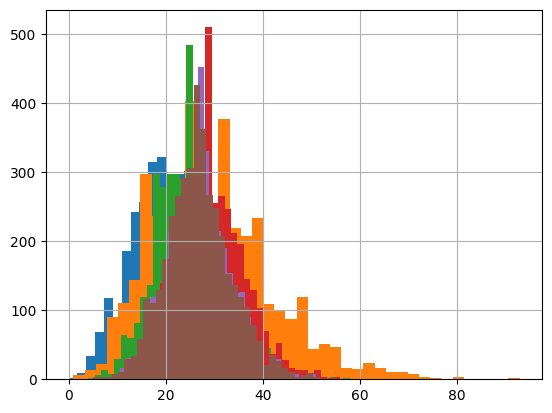

In [91]:
df['home_clearances'].hist(bins=40)
df['away_clearances'].hist(bins=40)
df['clearances_avg_H'].hist(bins=40)
df['clearances_avg_A'].hist(bins=40)
df['clearances_avg_home'].hist(bins=40)
df['clearances_avg_away'].hist(bins=40)

<Axes: >

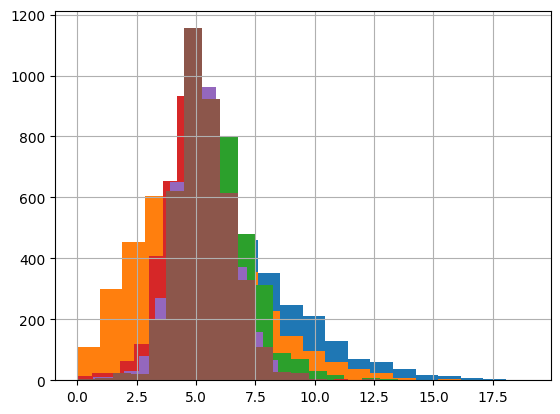

In [92]:
df['home_corners'].hist(bins=20)
df['away_corners'].hist(bins=20)
df['corners_avg_H'].hist(bins=20)
df['corners_avg_A'].hist(bins=20)
df['corners_avg_home'].hist(bins=20)
df['corners_avg_away'].hist(bins=20)

<Axes: >

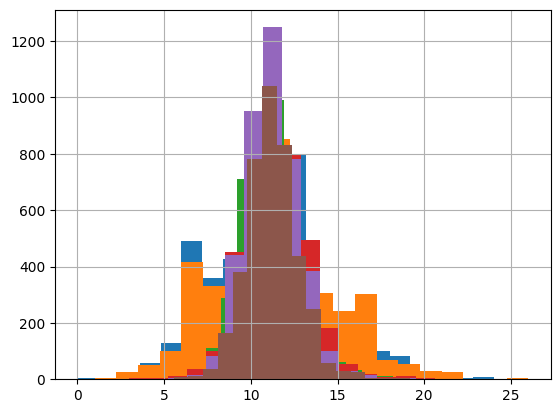

In [93]:
df['home_fouls_conceded'].hist(bins=20)
df['away_fouls_conceded'].hist(bins=20)
df['fouls_conceded_avg_H'].hist(bins=20)
df['fouls_conceded_avg_A'].hist(bins=20)
df['fouls_conceded_avg_home'].hist(bins=20)
df['fouls_conceded_avg_away'].hist(bins=20)

<Axes: >

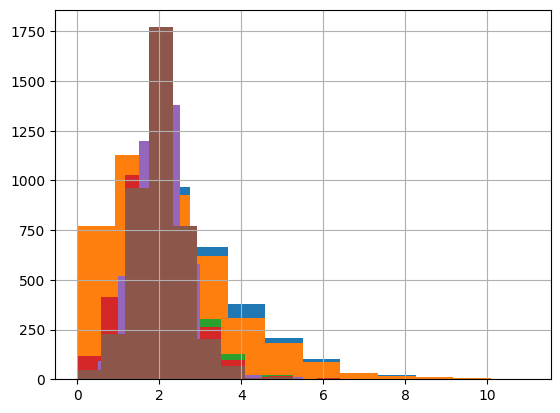

In [94]:
df['home_offsides'].hist(bins=12)
df['away_offsides'].hist(bins=12)
df['offsides_avg_H'].hist(bins=12)
df['offsides_avg_A'].hist(bins=12)
df['offsides_avg_home'].hist(bins=12)
df['offsides_avg_away'].hist(bins=12)

<Axes: >

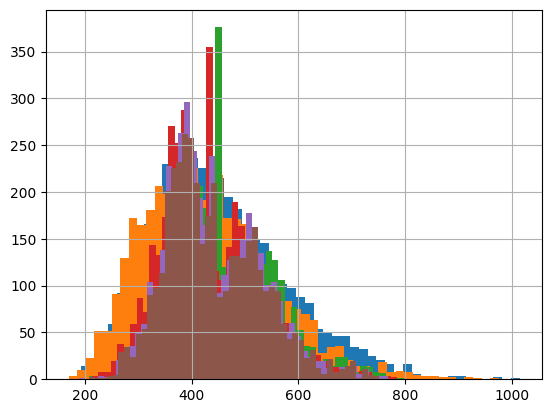

In [114]:
df['home_passes'].hist(bins=50)
df['away_passes'].hist(bins=50)
df['passes_avg_H'].hist(bins=50)
df['passes_avg_A'].hist(bins=50)
df['passes_avg_home'].hist(bins=50)
df['passes_avg_away'].hist(bins=50)

<Axes: >

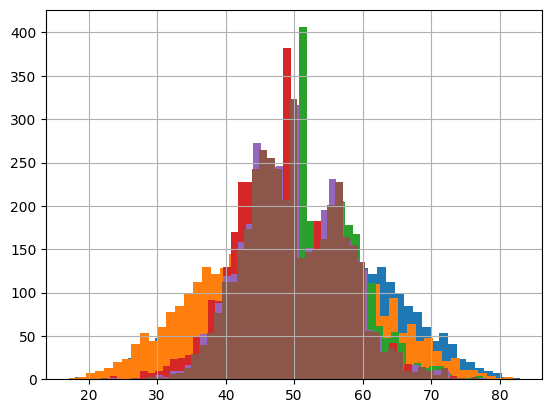

In [96]:
df['home_possession'].hist(bins=50)
df['away_possession'].hist(bins=50)
df['possession_avg_H'].hist(bins=50)
df['possession_avg_A'].hist(bins=50)
df['possession_avg_home'].hist(bins=50)
df['possession_avg_away'].hist(bins=50)

<Axes: >

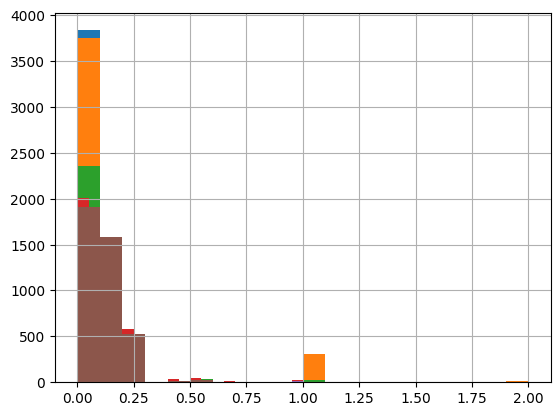

In [113]:
df['home_red_cards'].hist(bins=20)
df['away_red_cards'].hist(bins=20)
df['red_cards_avg_H'].hist(bins=20)
df['red_cards_avg_A'].hist(bins=20)
df['red_cards_avg_home'].hist(bins=20)
df['red_cards_avg_away'].hist(bins=20)

<Axes: >

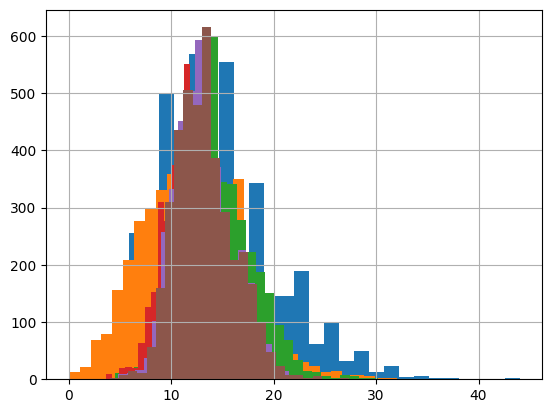

In [101]:
df['home_shots'].hist(bins=30)
df['away_shots'].hist(bins=30)
df['shots_avg_H'].hist(bins=30)
df['shots_avg_A'].hist(bins=30)
df['shots_avg_home'].hist(bins=30)
df['shots_avg_away'].hist(bins=30)

<Axes: >

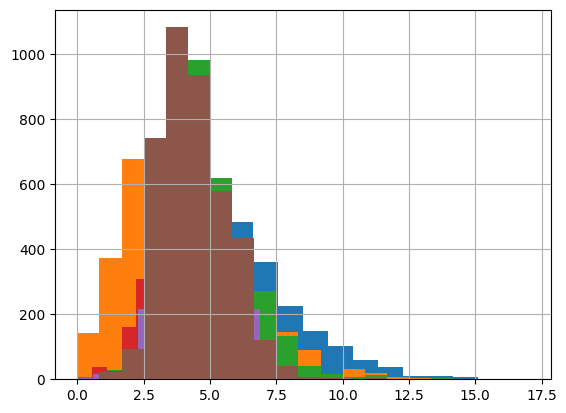

In [107]:
df['home_shots_on_target'].hist(bins=18)
df['away_shots_on_target'].hist(bins=18)
df['shots_on_target_avg_H'].hist(bins=18)
df['shots_on_target_avg_A'].hist(bins=18)
df['shots_on_target_avg_home'].hist(bins=18)
df['shots_on_target_avg_away'].hist(bins=18)

<Axes: >

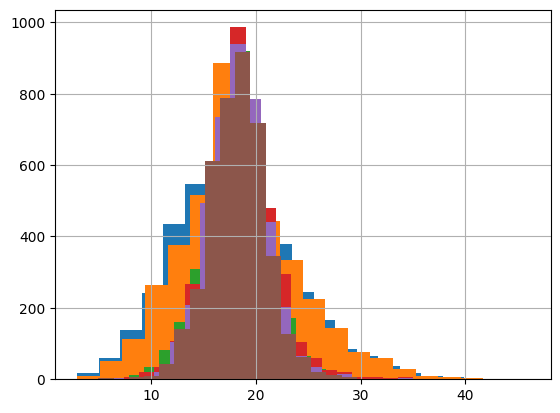

In [108]:
df['home_tackles'].hist(bins=20)
df['away_tackles'].hist(bins=20)
df['tackles_avg_H'].hist(bins=20)
df['tackles_avg_A'].hist(bins=20)
df['tackles_avg_home'].hist(bins=20)
df['tackles_avg_away'].hist(bins=20)

<Axes: >

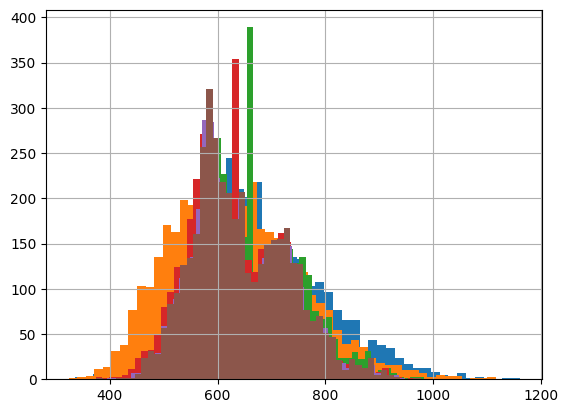

In [110]:
df['home_touches'].hist(bins=50)
df['away_touches'].hist(bins=50)
df['touches_avg_H'].hist(bins=50)
df['touches_avg_A'].hist(bins=50)
df['touches_avg_home'].hist(bins=50)
df['touches_avg_away'].hist(bins=50)

<Axes: >

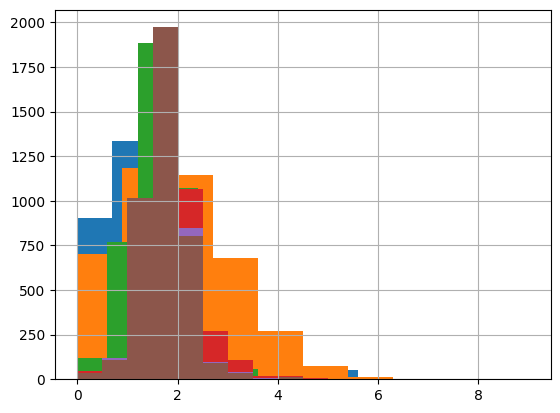

In [127]:
df['home_yellow_cards'].hist(bins=10)
df['away_yellow_cards'].hist(bins=10)
df['yellow_cards_avg_H'].hist(bins=10)
df['yellow_cards_avg_A'].hist(bins=10)
df['yellow_cards_avg_home'].hist(bins=10)
df['yellow_cards_avg_away'].hist(bins=10)

<Axes: >

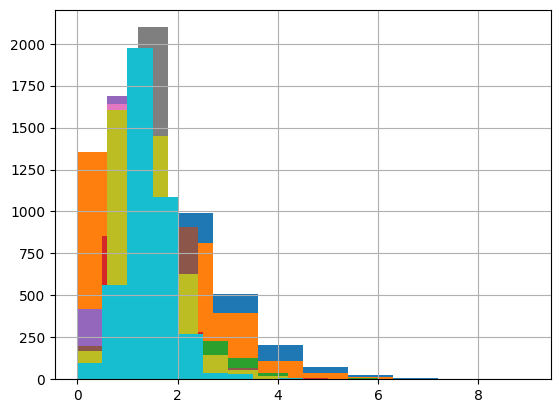

In [134]:
df['goal_home_ft'].hist(bins=10)
df['goal_away_ft'].hist(bins=10)
df['goals_scored_ft_avg_H'].hist(bins=10)
df['goals_conced_ft_avg_H'].hist(bins=10)
df['goals_scored_ft_avg_A'].hist(bins=10)
df['goals_conced_ft_avg_A'].hist(bins=10)
df['goals_scored_ft_avg_home'].hist(bins=10)
df['goals_conced_ft_avg_home'].hist(bins=10)
df['goals_scored_ft_avg_away'].hist(bins=10)
df['goals_conced_ft_avg_away'].hist(bins=10)

<Axes: >

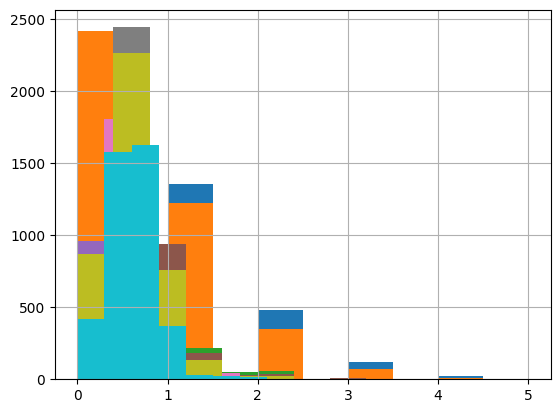

In [144]:
df['goal_home_ht'].hist(bins=10)
df['goal_away_ht'].hist(bins=10)
df['goals_scored_ht_avg_H'].hist(bins=10)
df['goals_conced_ht_avg_H'].hist(bins=10)
df['goals_scored_ht_avg_A'].hist(bins=10)
df['goals_conced_ht_avg_A'].hist(bins=10)
df['goals_scored_ht_avg_home'].hist(bins=10)
df['goals_conced_ht_avg_home'].hist(bins=10)
df['goals_scored_ht_avg_away'].hist(bins=10)
df['goals_conced_ht_avg_away'].hist(bins=10)

<Axes: >

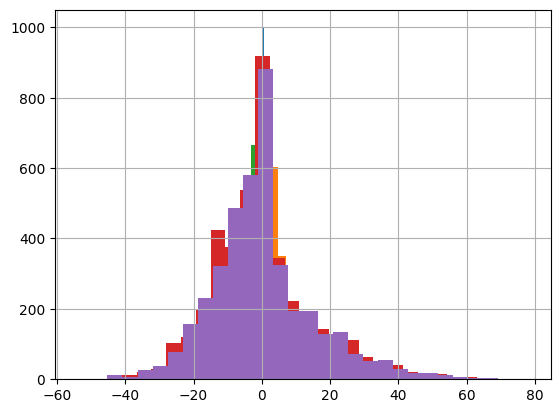

In [150]:
df['sg_match_ft'].hist(bins=30)
df['sg_match_ft_acum_H'].hist(bins=30)
df['sg_match_ft_acum_A'].hist(bins=30)
df['sg_match_ft_acum_home'].hist(bins=30)
df['sg_match_ft_acum_away'].hist(bins=30)

<Axes: >

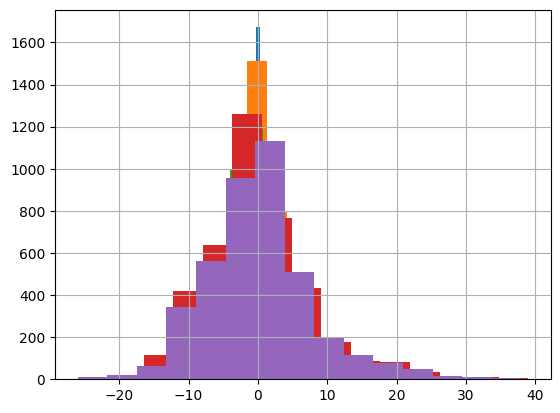

In [153]:
df['sg_match_ht'].hist(bins=15)
df['sg_match_ht_acum_H'].hist(bins=15)
df['sg_match_ht_acum_A'].hist(bins=15)
df['sg_match_ht_acum_home'].hist(bins=15)
df['sg_match_ht_acum_away'].hist(bins=15)

<Axes: >

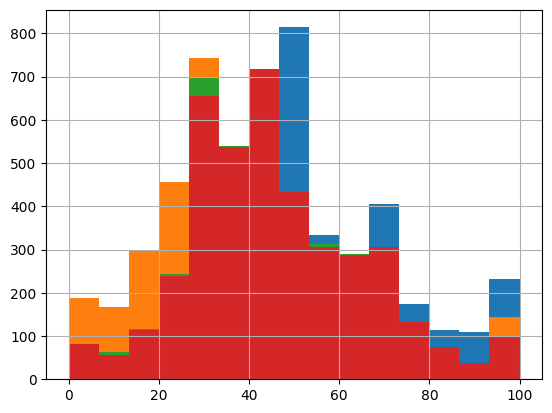

In [167]:
df['performance_acum_H'].hist(bins=15)
df['performance_acum_A'].hist(bins=15)
df['performance_acum_home'].hist(bins=15)
df['performance_acum_away'].hist(bins=15)

3.3 - Tratamiento de datos innecesarios

El tratamiento de datos innecesarios se compone, a su vez, de varios tipos de tratamientos que comparten el propósito de lograr que todos los datos del modelo sirvan para alcanzar el objetivo del proyecto. Todos los datos resultantes tienen que añadir valor, y para eliminar los que no aportan dicho valor, tenemos los siguientes tratamientos:

*   Tratamiento de datos contaminados
*   Tratamiento de datos inconsistentes
*   Tratamiento de datos duplicados
*   Tratamiento con los tipos de datos






3.3.1 Datos inconsistentes

Capitalización:

In [168]:
df['home_team'].value_counts(dropna=False)
df['away_team'].value_counts(dropna=False)

Manchester United           205
Arsenal                     204
Chelsea                     204
Manchester City             203
Everton                     203
Liverpool                   203
Tottenham Hotspur           202
Newcastle United            185
West Ham United             184
Southampton                 166
West Bromwich Albion        165
Stoke City                  152
Aston Villa                 147
Crystal Palace              146
Sunderland                  133
Swansea City                133
Leicester City              129
Fulham                      109
Burnley                     108
Norwich City                 95
Watford                      95
AFC Bournemouth              94
Wolverhampton Wanderers      91
Brighton and Hove Albion     70
Queens Park Rangers          57
Hull City                    57
Wigan Athletic               57
Huddersfield Town            38
Bolton Wanderers             38
Cardiff City                 38
Blackburn Rovers             38
Sheffiel

In [169]:
df['home_team'] = df['home_team'].str.lower()
df['home_team'].value_counts(dropna=False)

manchester city             205
liverpool                   204
manchester united           203
chelsea                     203
arsenal                     203
everton                     203
tottenham hotspur           203
newcastle united            184
west ham united             184
west bromwich albion        167
southampton                 165
stoke city                  152
crystal palace              146
aston villa                 145
swansea city                133
sunderland                  133
leicester city              127
burnley                     110
fulham                      109
norwich city                 95
watford                      95
afc bournemouth              95
wolverhampton wanderers      89
brighton and hove albion     71
queens park rangers          57
wigan athletic               57
hull city                    57
huddersfield town            38
cardiff city                 38
bolton wanderers             38
blackburn rovers             38
sheffiel

In [170]:
df['away_team'] = df['away_team'].str.lower()
df['away_team'].value_counts(dropna=False)

manchester united           205
arsenal                     204
chelsea                     204
manchester city             203
everton                     203
liverpool                   203
tottenham hotspur           202
newcastle united            185
west ham united             184
southampton                 166
west bromwich albion        165
stoke city                  152
aston villa                 147
crystal palace              146
sunderland                  133
swansea city                133
leicester city              129
fulham                      109
burnley                     108
norwich city                 95
watford                      95
afc bournemouth              94
wolverhampton wanderers      91
brighton and hove albion     70
queens park rangers          57
hull city                    57
wigan athletic               57
huddersfield town            38
bolton wanderers             38
cardiff city                 38
blackburn rovers             38
sheffiel

Duplicados:

In [171]:
key = ['season', 'date', 'home_team', 'away_team', 'result_full']
df_dup = df.drop_duplicates(subset=key)

print("Registros originales:")
print(df.shape, "\n")
print("Registros sin duplicados:")
print(df_dup.shape, "\n")

Registros originales:
(4070, 114) 

Registros sin duplicados:
(4070, 114) 



Repetitivos:

In [172]:
#Con más del 90%
num_rows = len(df.index)
low_information_cols = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.90:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

home_red_cards: 94.20147%
0.0    3834
1.0     229
2.0       7
Name: home_red_cards, dtype: int64

away_red_cards: 92.16216%
0.0    3751
1.0     305
2.0      14
Name: away_red_cards, dtype: int64



In [28]:
csv_name = "datasetLimpio.csv"
df.to_csv(csv_name, index=False)

print(f"El archivo '{csv_name}' ha sido guardado con éxito.")

El archivo 'datasetLimpio.csv' ha sido guardado con éxito.
